In [2]:
require(data.table)
require(ggplot2)
setwd("~/WGS/SNPS/All_mylu/snps/")

Loading required package: data.table
Loading required package: ggplot2


In [3]:
njeu=fread("NJ_EU2.mafs", sep=",")
nyeu=fread("NY_EU.mafs")
vteu=fread("VT_EU.mafs")

Read 92371963 rows and 10 (of 10) columns from 5.396 GB file in 00:02:33


In [4]:
colnames(njeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [5]:
colnames(nyeu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [6]:
colnames(vteu)=c("Scaffold", "Position", "Major", "Minor", "KnownMaf_E", "UnknownMaf_E", "nInd_E", "KnownMaf_U", "UnknownMaf_U", "nInd_U")

In [7]:
head (vteu)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U
GL429767,54,G,T,0.059311,0.059309,12,0.000000,0.000001,12
GL429767,78,G,A,0.000000,0.000003,14,0.050627,0.050626,12
GL429767,83,G,T,0.000000,0.000001,14,0.053591,0.053402,11
GL429767,104,A,T,0.000000,0.000002,14,0.052299,0.052299,11
GL429767,109,T,C,0.000000,0.000001,14,0.000000,0.000001,13
GL429767,112,G,A,0.000000,0.000001,14,0.054384,0.016177,13


In [8]:
njeu$diff=abs(njeu$UnknownMaf_E-njeu$UnknownMaf_U)

In [9]:
njeusnps=njeu[diff>0,]

In [10]:
njeunuc=njeusnps[Scaffold!="AAPE02072785",]

In [11]:
nyeu$diff=abs(nyeu$UnknownMaf_E-nyeu$UnknownMaf_U)

In [12]:
nyeusnps=nyeu[diff>0,]

In [13]:
vteu$diff=abs(vteu$UnknownMaf_E-vteu$UnknownMaf_U)

In [14]:
vteusnps=vteu[diff>0,]

In [15]:
write.csv(vteusnps, file="vteusnps.csv")

In [16]:
write.csv(njeusnps, file="njeusnps.csv")

In [17]:
write.csv(nyeusnps, file="nyeusnps.csv")

In [3]:
vteusnps=fread("vteusnps.csv", sep=",")
njeusnps=fread("njeusnps.csv", sep=",")
nyeusnps=fread("nyeusnps.csv", sep=",")

Read 85764532 rows and 12 (of 12) columns from 6.106 GB file in 00:06:23
Read 84992656 rows and 12 (of 12) columns from 5.996 GB file in 00:04:07
Read 83876104 rows and 12 (of 12) columns from 5.916 GB file in 00:03:41


Malin's comments: - What does the distribution of allele frequency changes look like across all loci? How far out in the tail do these 10 sit relative to the others? (histogram)
I have the histogram, I just need to plot the 10 loci onto it. 

- What does the distribution of coverage look like across loci? Where do these ten sit relative to the other loci?
Plot distribution of coverage and then plot these 10

- Is coverage related to allele frequency change?
Bin low med and high freq change, look at coverage? (cant plot all together)

- Do other loci in the vicinity of these 10 also show large allele frequency changes? On average, I think you should have a SNP every 32 bp on average. A sliding window analysis would be another way to look for this effect.

quesiton: how big of a sliding window. Need to take output from snp analysis and figure out FST value for it. 
Look at SNPs nearby...within 100 basepairs?



In [8]:
AAPE02072785nj=njeu[Scaffold=="AAPE02072785"& diff>0,]

ERROR: Error in eval(expr, envir, enclos): object 'njeu' not found


In [20]:
AAPE02072785nj=AAPE02072785nj[order(-AAPE02072785nj$diff),] 
head(AAPE02072785nj)
NROW(AAPE02072785nj)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3122,T,C,0.000000,0.000001,17,0.531726,0.531722,18,0.531721
AAPE02072785,9106,T,C,0.000000,0.000003,15,0.450000,0.450000,20,0.449997
AAPE02072785,3452,C,T,0.366587,0.366586,17,0.025846,0.013281,18,0.353305
AAPE02072785,4984,T,A,0.351201,0.351202,20,0.000000,0.000000,20,0.351202
AAPE02072785,3499,A,C,0.335005,0.335006,17,0.000000,0.000003,18,0.335003
AAPE02072785,19163,G,A,0.000000,0.000003,9,0.378212,0.320513,17,0.320510


[1] 315

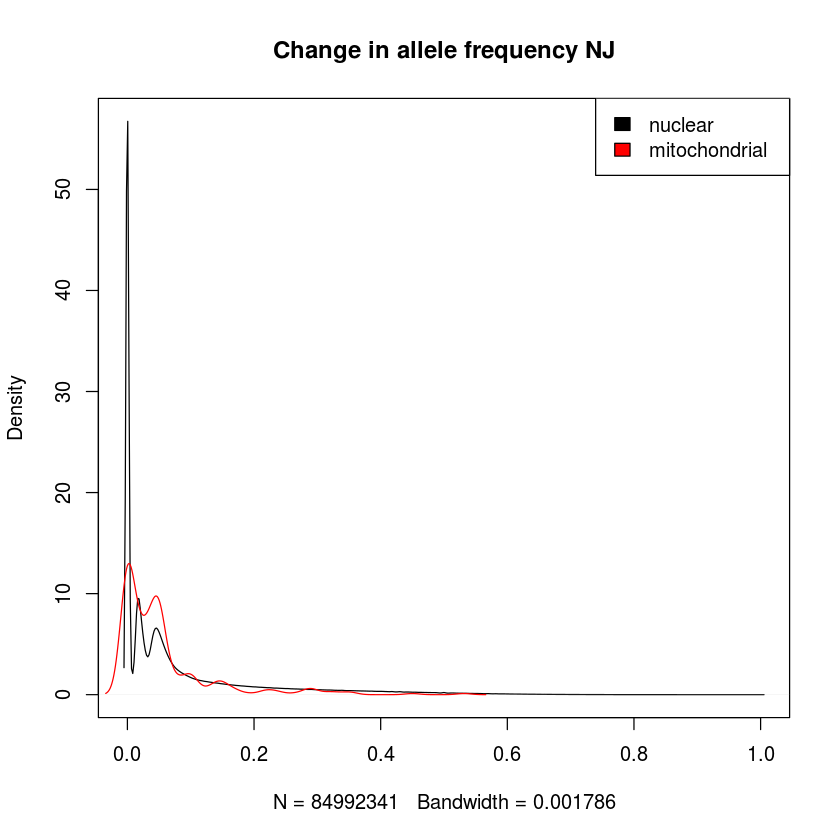

In [21]:
plot(density(njeunuc$diff), main="Change in allele frequency NJ")
     lines(density(AAPE02072785nj$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [29]:
AAPE02072785ny=nyeu[Scaffold=="AAPE02072785"& diff>0,]

In [30]:
AAPE02072785ny=AAPE02072785ny[order(-AAPE02072785ny$diff),] 
head(AAPE02072785ny)
NROW(AAPE02072785ny)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3515,A,G,0.314975,0.314978,19,0.060067,0.020071,13,0.294907
AAPE02072785,19154,T,C,0.349320,0.349321,9,0.239162,0.093847,7,0.255474
AAPE02072785,18742,C,T,0.245570,0.245568,10,0.000000,0.000005,5,0.245563
AAPE02072785,3148,T,C,0.000000,0.000001,15,0.232086,0.232083,12,0.232082
AAPE02072785,3470,T,C,0.233583,0.233586,20,0.065851,0.019229,13,0.214357
AAPE02072785,19900,A,T,0.212611,0.212613,16,0.029665,0.029277,19,0.183336


[1] 317

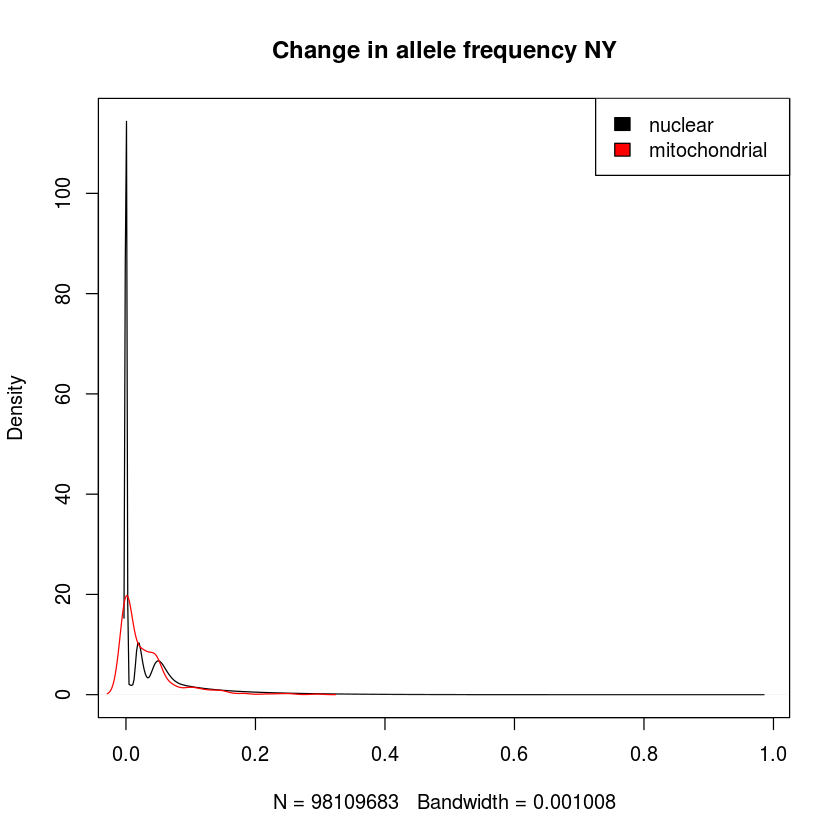

In [24]:
plot(density(nyeusnps$diff), main="Change in allele frequency NY")
     lines(density(AAPE02072785ny$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

In [22]:
AAPE02072785vt=vteu[Scaffold=="AAPE02072785" ,]

In [23]:
NROW(AAPE02072785vt)

[1] 450

In [24]:
AAPE02072785vt=AAPE02072785vt[order(-AAPE02072785vt$diff),] 
head(AAPE02072785vt)
NROW(AAPE02072785vt)

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3499,A,C,0.304413,0.304412,27,0.652526,0.652524,12,0.348112
AAPE02072785,11664,C,T,0.259656,0.259656,27,0.580883,0.580883,20,0.321227
AAPE02072785,3452,C,T,0.340808,0.340810,27,0.650519,0.650517,12,0.309707
AAPE02072785,3465,G,A,0.196603,0.196603,27,0.491657,0.491651,12,0.295048
AAPE02072785,19880,T,C,0.102001,0.102001,23,0.355707,0.355709,11,0.253708
AAPE02072785,3508,T,C,0.000000,0.000000,27,0.247262,0.247260,10,0.247260


[1] 450

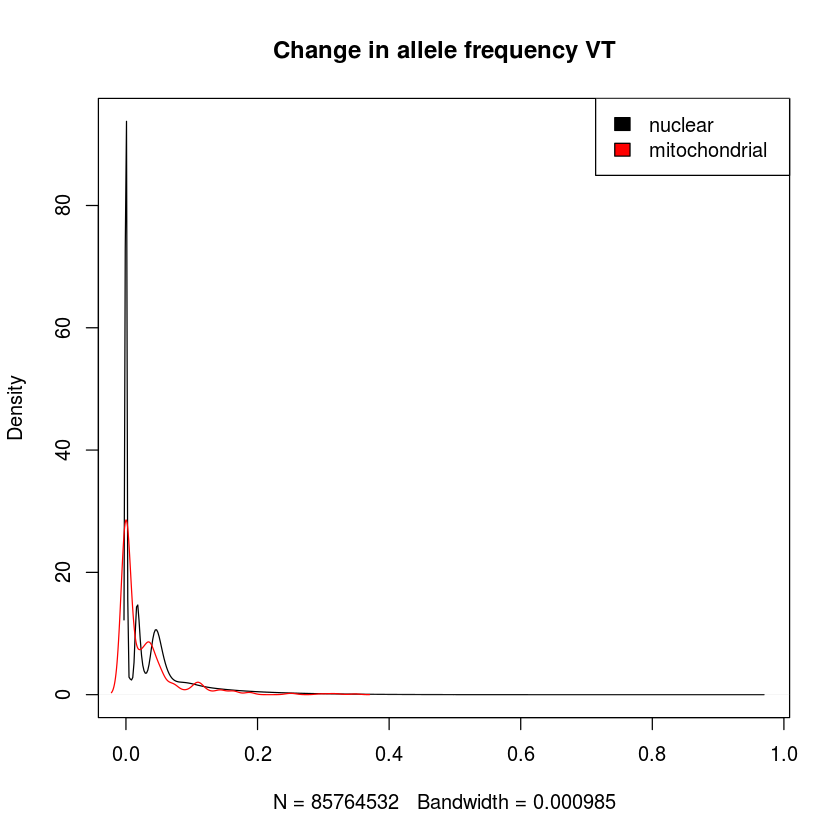

In [25]:
plot(density(vteusnps$diff), main="Change in allele frequency VT")
     lines(density(AAPE02072785vt$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

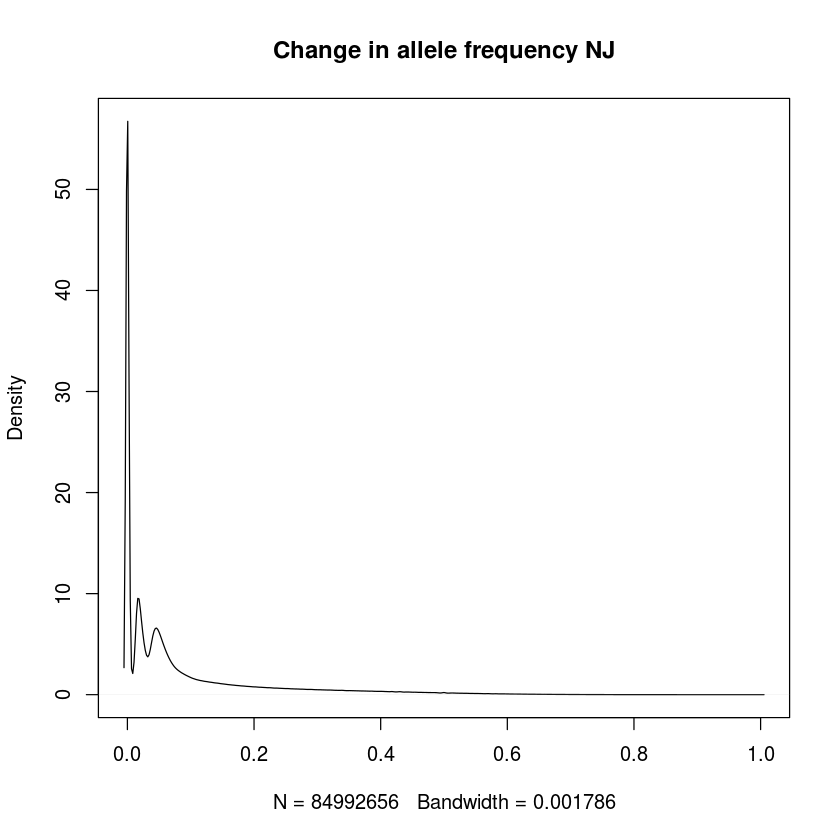

In [9]:
plot(density(njeusnps$diff), main="Change in allele frequency NJ")

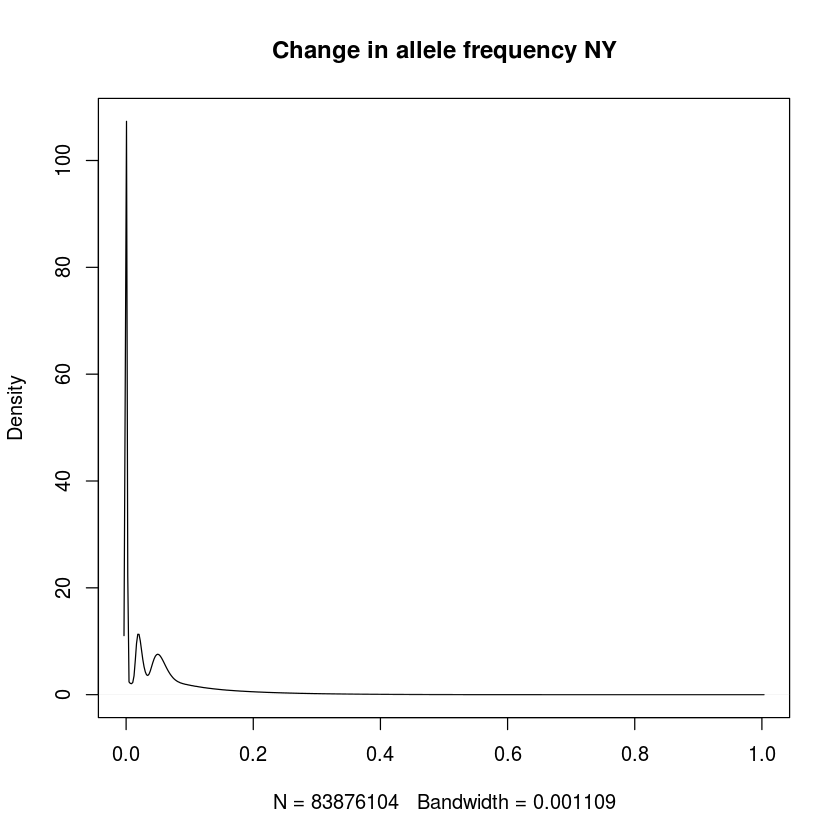

In [10]:
plot(density(nyeusnps$diff), main="Change in allele frequency NY")

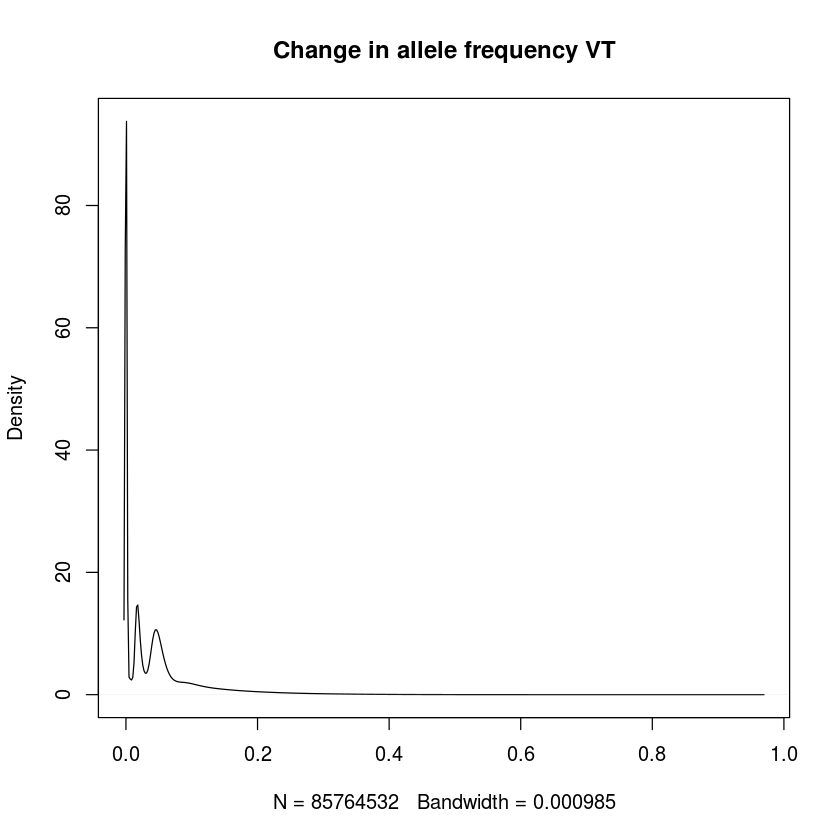

In [11]:
plot(density(vteusnps$diff), main="Change in allele frequency VT")

Wright fisher simulatins to see if that change is due to drift alone? 
Use probabilistic nature of genotypes as input?
Tajiimas D, heterozygosity, allele freq change in the immediate region of these SNPs. 

In [ ]:
plot(njeusnps$nInd_E, njeusnps$diff)
#lines(density(AAPE02072785ny$diff), col="red") 

In [26]:
mitonjvt=merge(AAPE02072785nj, AAPE02072785vt, by="Position")

In [27]:
NROW(mitonjvt)

[1] 315

In [31]:
mitonyvt=merge(AAPE02072785ny, AAPE02072785vt, by="Position")
NROW(mitonyvt)

[1] 317

In [32]:
mitonynj=merge(AAPE02072785ny, AAPE02072785nj, by="Position")
NROW(mitonynj)

[1] 234

In [33]:
mitonjvtny=merge(AAPE02072785ny, mitonjvt, by="Position")

In [34]:
NROW(mitonjvtny)

[1] 234

In [4]:
njeutop=njeu[order(-njeu$diff),] 

ERROR: Error in eval(expr, envir, enclos): object 'njeu' not found


In [5]:
njeu50=njeusnps[diff>=0.5,]

In [8]:
colnames(njeu50)

[1] "V1"           "Scaffold"     "Position"     "Major"        "Minor"       
 [6] "KnownMaf_E"   "UnknownMaf_E" "nInd_E"       "KnownMaf_U"   "UnknownMaf_U"
[11] "nInd_U"       "absdiff"

In [6]:
colnames(njeu50)[12]="absdiff"

In [34]:
njeu50$diff=njeu50$UnknownMaf_E-njeu50$UnknownMaf_U

In [7]:
NROW(njeu50)

[1] 1417469

In [38]:
nyeutop=nyeu[order(-nyeu$diff),] 

In [8]:
nyeu50=nyeusnps[diff>=0.5,]

In [9]:
colnames(nyeu50)[12]="absdiff"

In [10]:
nyeu50$diff=nyeu50$UnknownMaf_E-nyeu50$UnknownMaf_U

In [11]:
NROW(nyeu50)

[1] 94231

In [41]:
vteutop=vteu[order(-vteu$diff),] 

In [12]:
vteu50=vteusnps[diff>=0.5,]

In [13]:
colnames(vteu50)[12]="absdiff"

In [33]:
vteu50$diff=vteu50$UnknownMaf_E-vteu50$UnknownMaf_U

In [15]:
NROW(vteu50)

[1] 45013

In [ ]:
njeutop2=njeutop[1:2188485,]

In [35]:
njny50=merge(njeu50, nyeu50, by=c("Scaffold", "Position"))

In [36]:
colnames(njny50)

[1] "Scaffold"       "Position"       "V1.x"           "Major.x"       
 [5] "Minor.x"        "KnownMaf_E.x"   "UnknownMaf_E.x" "nInd_E.x"      
 [9] "KnownMaf_U.x"   "UnknownMaf_U.x" "nInd_U.x"       "absdiff.x"     
[13] "diff.x"         "V1.y"           "Major.y"        "Minor.y"       
[17] "KnownMaf_E.y"   "UnknownMaf_E.y" "nInd_E.y"       "KnownMaf_U.y"  
[21] "UnknownMaf_U.y" "nInd_U.y"       "absdiff.y"      "diff.y"

In [37]:
njnyvt50=merge(njny50, vteu50, by=c("Scaffold", "Position"))

In [28]:
NROW(njnyvt50)

[1] 56

In [38]:
head(njnyvt50)

Scaffold,Position,V1.x,Major.x,Minor.x,KnownMaf_E.x,UnknownMaf_E.x,nInd_E.x,KnownMaf_U.x,UnknownMaf_U.x,⋯,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,absdiff,diff
GL429767,4380147,197148,C,A,0.639555,0.639555,15,0.135642,0.135641,⋯,C,A,0.549148,0.159976,11,0.678510,0.678509,13,0.518533,-0.518533
GL429775,9101293,11199573,A,T,1.000004,0.999996,6,0.445669,0.445670,⋯,A,T,0.191705,0.191710,16,0.707841,0.707842,12,0.516132,-0.516132
GL429778,10560380,13910230,A,G,0.681164,0.681166,15,0.178912,0.178911,⋯,A,G,0.819268,0.819271,9,0.274205,0.274211,15,0.545060,0.545060
GL429779,15275365,15186049,T,C,0.257400,0.257400,11,0.801857,0.801853,⋯,T,C,0.789305,0.789302,12,0.284627,0.284626,13,0.504676,0.504676
GL429793,3619488,23553109,T,G,0.528160,0.528162,15,0.063697,0.022021,⋯,T,G,0.829730,0.829730,12,0.259294,0.259297,15,0.570433,0.570433
GL429799,2747281,24315091,G,A,0.546562,0.546558,18,0.000000,0.000003,⋯,G,A,0.257564,0.091236,15,0.627030,0.627028,11,0.535792,-0.535792


In [39]:
njnyvt50$KnownMaf_E.x=NULL
njnyvt50$KnownMaf_U.x=NULL
njnyvt50$KnownMaf_E.y=NULL
njnyvt50$KnownMaf_U.y=NULL
njnyvt50$KnownMaf_E=NULL
njnyvt50$KnownMaf_U=NULL

In [40]:
colnames(njnyvt50)

[1] "Scaffold"       "Position"       "V1.x"           "Major.x"       
 [5] "Minor.x"        "UnknownMaf_E.x" "nInd_E.x"       "UnknownMaf_U.x"
 [9] "nInd_U.x"       "absdiff.x"      "diff.x"         "V1.y"          
[13] "Major.y"        "Minor.y"        "UnknownMaf_E.y" "nInd_E.y"      
[17] "UnknownMaf_U.y" "nInd_U.y"       "absdiff.y"      "diff.y"        
[21] "V1"             "Major"          "Minor"          "UnknownMaf_E"  
[25] "nInd_E"         "UnknownMaf_U"   "nInd_U"         "absdiff"       
[29] "diff"

In [41]:
colnames(njnyvt50)=c("Scaffold", "Position", "V1_NJ", "Major_NJ", "Minor_NJ", "Maf_NJE", "nInd_NJE", "Maf_NJU", "nInd_NJU","absdiff_NJ", "diff_NJ",
                    "V1_NY", "Major_NY", "Minor_NY", "Maf_NYE", "nInd_NYE", "Maf_NYU", "nInd_NYU", "absdiff_NY","diff_NY",
                    "V1_VT", "Major_VT", "Minor_VT", "Maf_VTE", "nInd_VTE", "Maf_VTU", "nInd_VTU","absdiff_VT", "diff_VT")

Only taking otus that have the same direction of allele frequency change

In [42]:
njnyvt50pos=njnyvt50[njnyvt50$diff_NJ>0 & njnyvt50$diff_NY>0 & njnyvt50$diff_VT>0,]

In [43]:
NROW(njnyvt50pos)

[1] 10

In [44]:
njnyvt50neg=njnyvt50[njnyvt50$diff_NJ<0 & njnyvt50$diff_NY<0 & njnyvt50$diff_VT<0,]

In [45]:
NROW(njnyvt50neg)

[1] 0

In [46]:
write.csv(njnyvt50pos, "Candidate_SNPs_NJNYVT.csv")

In [28]:
AAPE02072785nj

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,2544,A,G,0.031234,0.030991,19,0.531726,0.531722,18,0.500731
AAPE02072785,9261,C,T,0.000000,0.000000,21,0.500000,0.500000,22,0.500000


In [31]:
nyeutop2=nyeutop[1:2188485,]

In [34]:
AAPE02072785ny=nyeutop2[Scaffold=="AAPE02072785",]

In [35]:
AAPE02072785ny

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,3515,A,G,0.314975,0.314978,19,0.060067,0.020071,13,0.294907


In [30]:
vteutop2=vteutop[1:2188485,]

In [32]:
AAPE02072785vt=vteutop2[Scaffold=="AAPE02072785",]

In [33]:
AAPE02072785vt

Scaffold,Position,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
AAPE02072785,1436,T,C,0.000000,0.000000,19,0.365848,0.365849,9,0.365849
AAPE02072785,11664,C,T,0.259656,0.259656,27,0.620223,0.620223,22,0.360567
AAPE02072785,3499,A,C,0.304413,0.304412,27,0.652526,0.652524,12,0.348112
AAPE02072785,3452,C,T,0.340808,0.340810,27,0.650519,0.650517,12,0.309707
AAPE02072785,3465,G,A,0.196603,0.196603,27,0.491657,0.491651,12,0.295048
AAPE02072785,3508,T,C,0.000000,0.000000,27,0.247262,0.247260,10,0.247260


In [35]:
njnytop2=merge(njeutop2, nyeutop2, by=c("Scaffold", "Position"))

In [27]:
NROW(njnytop2)

[1] 192644

In [36]:
njnyvttop2=merge(njnytop2, vteutop2, by=c("Scaffold", "Position"))

In [29]:
NROW(njnyvttop2)

[1] 35834

In [37]:
AAPE02072785=njnyvttop2[Scaffold=="AAPE02072785",]

In [38]:
NROW(AAPE02072785)

[1] 0

In [32]:
GL429767=njnyvttop2[Scaffold=="GL429767",]

In [33]:
GL429767

Scaffold,Position,Major.x,Minor.x,KnownMaf_E.x,UnknownMaf_E.x,nInd_E.x,KnownMaf_U.x,UnknownMaf_U.x,nInd_U.x,⋯,diff.y,Major,Minor,KnownMaf_E,UnknownMaf_E,nInd_E,KnownMaf_U,UnknownMaf_U,nInd_U,diff
GL429767,378240,C,T,0.143361,0.050281,10,0.681577,0.681575,12,⋯,0.308775,C,T,0.328825,0.328827,13,0.644635,0.644636,15,0.315809
GL429767,2563529,A,G,0.604762,0.604761,13,0.219827,0.057143,6,⋯,0.298034,A,G,0.618599,0.618593,15,0.370621,0.370623,16,0.247970
GL429767,2900778,T,C,0.321339,0.321338,15,0.827021,0.827019,10,⋯,0.292420,T,C,0.235327,0.235169,9,0.530903,0.530906,17,0.295737
GL429767,3160344,C,A,0.650418,0.650414,19,0.239252,0.072788,7,⋯,0.280202,C,A,0.627062,0.627053,17,0.350958,0.350962,16,0.276091
GL429767,4550108,C,T,0.765996,0.765996,14,0.190930,0.190937,11,⋯,0.526260,C,T,0.557562,0.557562,15,0.246413,0.246413,13,0.311149
GL429767,4777116,G,T,0.540725,0.540721,12,0.000000,0.000004,7,⋯,0.391845,G,T,0.397839,0.091126,13,0.336501,0.336504,16,0.245378
GL429767,5088979,C,T,0.631333,0.631329,13,0.265451,0.083899,7,⋯,0.466385,C,T,0.385597,0.385600,12,0.747953,0.747955,13,0.362355
GL429767,5324740,T,C,0.288780,0.288786,12,0.924464,0.924466,11,⋯,0.284780,T,C,0.217886,0.217890,10,0.561746,0.561749,12,0.343859
GL429767,5837026,C,T,0.086096,0.025981,10,0.598133,0.598130,13,⋯,0.268136,C,T,0.060510,0.060506,14,0.428700,0.428690,12,0.368184
GL429767,6147842,T,G,0.690324,0.690326,17,0.196797,0.194171,11,⋯,0.320887,T,G,0.610119,0.610110,15,0.218141,0.218144,20,0.391966


In [2]:


# Plot
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title) + scale_colour_manual(values=cbPalette)
ggsave(opt$out_file)
unlink("Rplots.pdf", force=TRUE)


ERROR: Error in as.data.frame(eig$vectors): object 'eig' not found


In [7]:
covar =read.table("/local/home/sarahgw/WGS/SNPS/All_mylu/genoprob/All_mylu_post.covar", stringsAsFact=F)
names=read.table("/local/home/sarahgw/WGS/Sequences//filelists//All_Mylu.filelist", stringsAsFact=F)
annot =read.table("/local/home/sarahgw/WGS/SNPS/All_mylu/genoprob/ALL_mylu.clst", sep="\t", header=T)
comp =as.numeric(strsplit("1-2", "-", fixed=TRUE)[[1]])

In [2]:
# Eigenvalues
eig <- eigen(covar, symm=TRUE);
eig$val <- eig$val/sum(eig$val);
cat(signif(eig$val, digits=3)*100,"\n");

2.41 1.75 1.52 1.45 1.4 1.39 1.32 1.26 1.23 1.23 1.22 1.17 1.16 1.11 1.09 1.08 1.07 1.06 1.05 1.04 1.01 1.01 1 0.998 0.988 0.977 0.964 0.95 0.947 0.941 0.934 0.929 0.922 0.91 0.905 0.903 0.902 0.901 0.898 0.896 0.884 0.872 0.865 0.864 0.861 0.854 0.846 0.843 0.839 0.834 0.828 0.823 0.819 0.816 0.812 0.808 0.804 0.793 0.786 0.768 0.75 0.739 0.737 0.732 0.726 0.72 0.713 0.706 0.703 0.693 0.684 0.679 0.671 0.66 0.656 0.653 0.645 0.64 0.63 0.614 0.612 0.606 0.597 0.592 0.584 0.577 0.577 0.576 0.575 0.568 0.565 0.56 0.556 0.549 0.543 0.538 0.534 0.529 0.522 0.513 0.505 0.5 0.496 0.493 0.489 0.485 0.481 0.473 0.468 0.464 0.462 0.448 0.439 0.432 0.426 0.419 0.415 0.398 0.387 0.377 0.363 0.349 0.344 0.335 0.318 0.311 0.307 0.302 0.293 0.275 0.269 0.253 0.234 0.231 0.229 0.00259 


In [3]:
require(ggplot2)

Loading required package: ggplot2


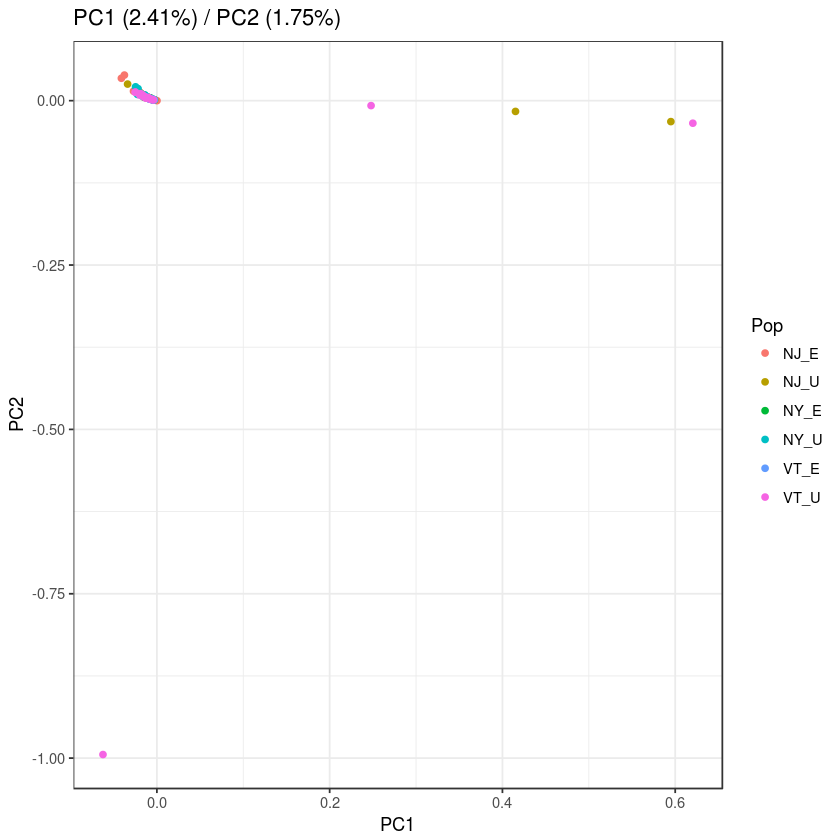

In [4]:
PC <- as.data.frame(eig$vectors)
colnames(PC) <- gsub("V", "PC", colnames(PC))
PC$Pop <- factor(annot$CLUSTER)

title <- paste("PC",comp[1]," (",signif(eig$val[comp[1]], digits=3)*100,"%)"," / PC",comp[2]," (",signif(eig$val[comp[2]], digits=3)*100,"%)",sep="",collapse="")

x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PC, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title)+theme_bw()

In [12]:
names[c(26,34,115, 121, 124),] 

[1] "NJ_U_04_pairedplus_marked_dupes.bam" "NJ_U_14_pairedplus_marked_dupes.bam"
[3] "VT_U_05_pairedplus_marked_dupes.bam" "VT_U_03_pairedplus_marked_dupes.bam"
[5] "VT_U_31_pairedplus_marked_dupes.bam"

In [9]:
PCNo=PC[-c(26,34,115, 121, 124),] 

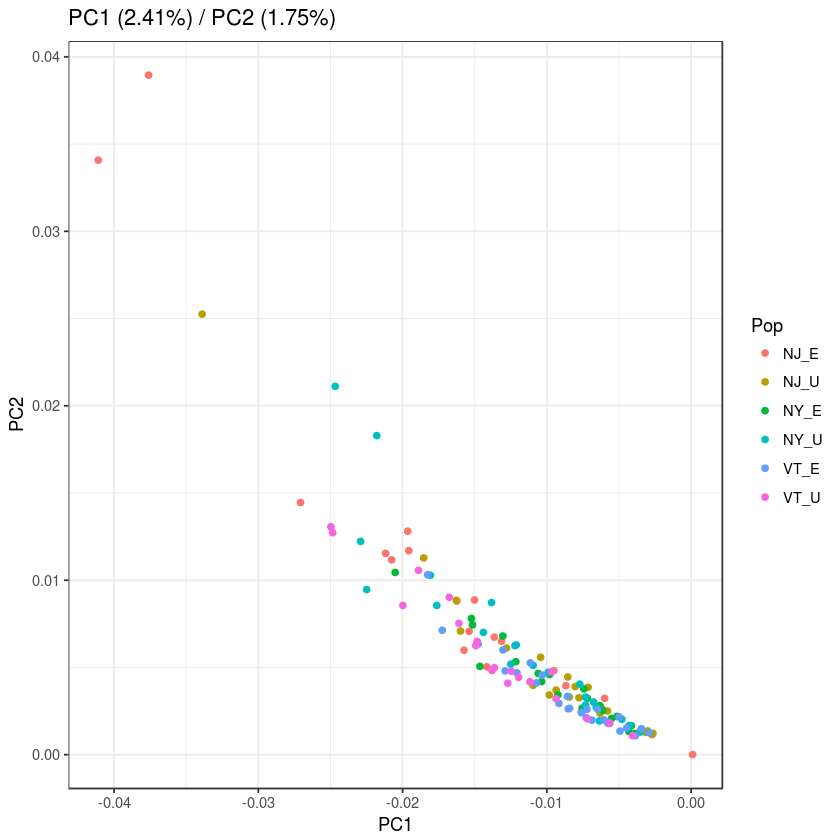

In [10]:
x_axis = paste("PC",comp[1],sep="")
y_axis = paste("PC",comp[2],sep="")

ggplot() + geom_point(data=PCNo, aes_string(x=x_axis, y=y_axis, color="Pop")) + ggtitle(title)+theme_bw()

In [8]:
print(PC)

              PC1           PC2           PC3           PC4           PC5
1    0.0001045627  8.742575e-06 -5.403543e-06  1.465511e-05  1.321112e-06
2   -0.0095141367  4.815358e-03 -3.585374e-03  3.205088e-03  5.836631e-05
3   -0.0061585496  2.624113e-03 -2.364706e-03  1.799066e-03  9.440653e-05
4   -0.0150139687  8.868360e-03 -8.818629e-03  1.880300e-03 -1.674443e-04
5   -0.0141571094  5.035983e-03 -4.477529e-03  7.444945e-03 -1.217901e-05
6   -0.0086813276  3.953350e-03 -4.082677e-03  1.210387e-03  2.418218e-05
7   -0.0196432357  1.281108e-02 -1.336309e-02  3.024633e-03  3.827733e-04
8   -0.0062647054  2.685757e-03 -2.090139e-03  1.843331e-03 -8.289116e-05
9   -0.0059948241  3.229099e-03 -2.692345e-03  5.920129e-04 -7.526546e-05
10  -0.0131408082  6.500367e-03 -5.876479e-03  4.575823e-03 -1.994645e-04
11  -0.0157405050  5.986617e-03 -5.426235e-03  1.066535e-02  4.295126e-04
12  -0.0376074475  3.895613e-02 -9.577669e-02 -9.832997e-01 -5.597849e-03
13  -0.0410980965  3.407916e-02  9.899

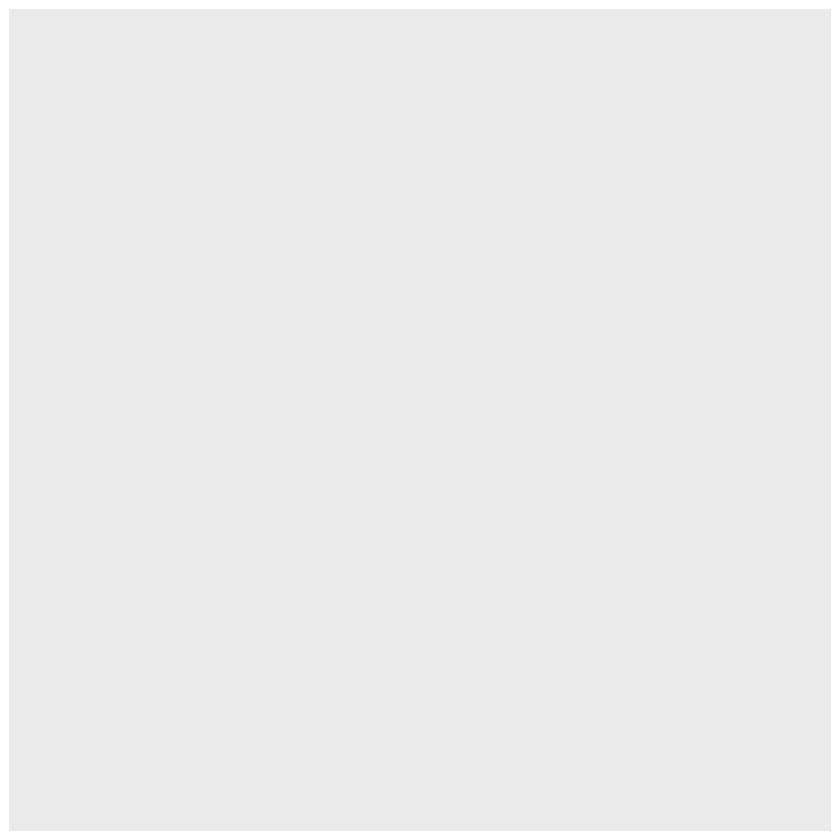

In [13]:
ggplot(data=PC, aes_string(color="Pop"))